# Detecting the persistence in pseudo-icecore d18O records

In this tutorial, we detect the biological memory in the trees (using the TRW data) in PAGES2k.

In [1]:
%load_ext autoreload
%autoreload 2

import cfr
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from statsmodels.tsa import stattools as st

import warnings
warnings.filterwarnings('ignore')

## Data preparation

### Proxy

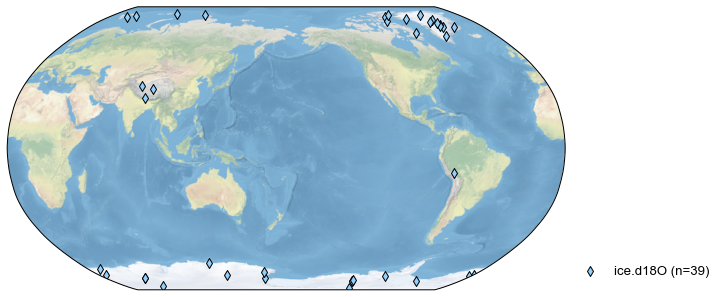

In [3]:
pdb = pd.read_pickle('./data/pseudoPAGES2k/pseudo.ice.d18O.pkl')
fig, ax = pdb.plot()

## Calculate the PACF for each site

In [4]:
pacf = {}
for pid, pobj in pdb.records.items():
    pacf[pid] = st.pacf(pobj.value, nlags=10)

In [5]:
for k, v in pacf.items():
    if v[1] > 0.9:
        print(k, v[1:4])

pseudo_Ant_020 [ 0.91469    -0.64647621  0.20521066]
pseudo_Arc_028 [ 0.91335999 -0.69389298  0.32781717]
pseudo_Ant_005 [ 0.91469    -0.64647621  0.20521066]
pseudo_Ant_016 [ 0.95817826 -0.34982359  0.03095069]
pseudo_Ant_015 [ 0.95817826 -0.34982359  0.03095069]
pseudo_Ant_014 [ 0.93819743 -0.21536989 -0.03096704]
pseudo_Ant_021 [ 0.94408608 -0.45224071  0.09038473]


In [6]:
pacf_lag = {}
pacf_lag[1] = []
pacf_lag[2] = []
pacf_lag[3] = []
lats = []
lons = []
for pid, pobj in pdb.records.items():
    pacf_tmp = st.pacf(pobj.value, nlags=10)
    pacf_lag[1].append(pacf_tmp[1])
    pacf_lag[2].append(pacf_tmp[2])
    pacf_lag[3].append(pacf_tmp[3])
    lats.append(pobj.lat)
    lons.append(pobj.lon)

(0.0, 1.0)

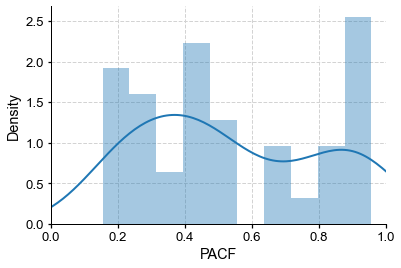

In [10]:
import seaborn as sns

pacf_list = []
for k, v in pacf.items():
    pacf_list.append(v[1])

ax = sns.distplot(pacf_list, bins=10)
ax.set_xlabel('PACF')
ax.set_xlim(0, 1)

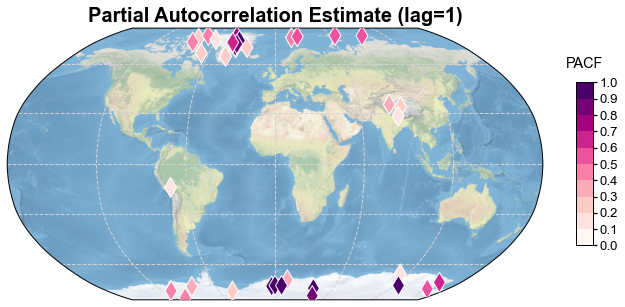

Figure saved at: "figs/pseudo.ice.d18O.pacf_lag1.pdf"


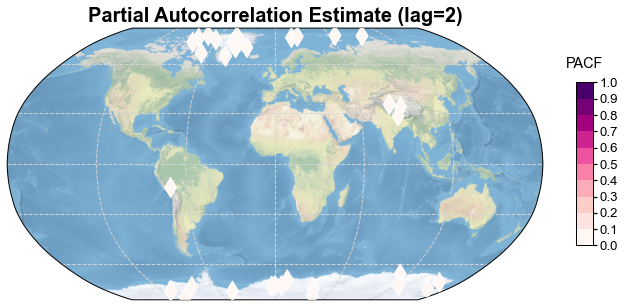

Figure saved at: "figs/pseudo.ice.d18O.pacf_lag2.pdf"


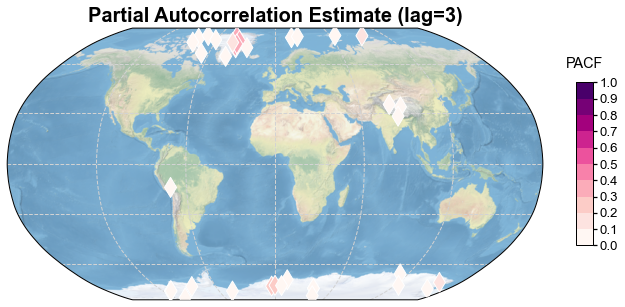

Figure saved at: "figs/pseudo.ice.d18O.pacf_lag3.pdf"


In [7]:
levels = np.arange(0, 1.1, 0.1)
cbar_ticks = np.arange(0, 1.1, 0.1)
cbar_title = 'PACF'
cmap = 'RdPu'

for i in range(1, 4):
    fig, ax = cfr.visual.plot_scatter_map(
        pacf_lag[i], lats, lons, marker='d', title=f'Partial Autocorrelation Estimate (lag={i})',
        cbar_ticks=cbar_ticks,
        cbar_title=cbar_title,
        levels=levels,
        cmap=cmap,
    )
    cfr.showfig(fig)
    cfr.savefig(fig, f'./figs/pseudo.ice.d18O.pacf_lag{i}.pdf')